In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [204]:
df = pd.read_csv("breastcancer.csv")

In [205]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [206]:
#M-malignant  B-benign
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [207]:
df.diagnosis = df.diagnosis.replace({"M":0, "B":1})
X = df.drop(columns = ["id","diagnosis"], axis=1)
y = df.diagnosis.values

In [208]:
X.info(), y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

(None,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1,

In [209]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

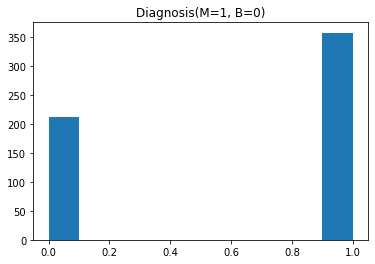

In [210]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis(M=1, B=0)')
plt.show()

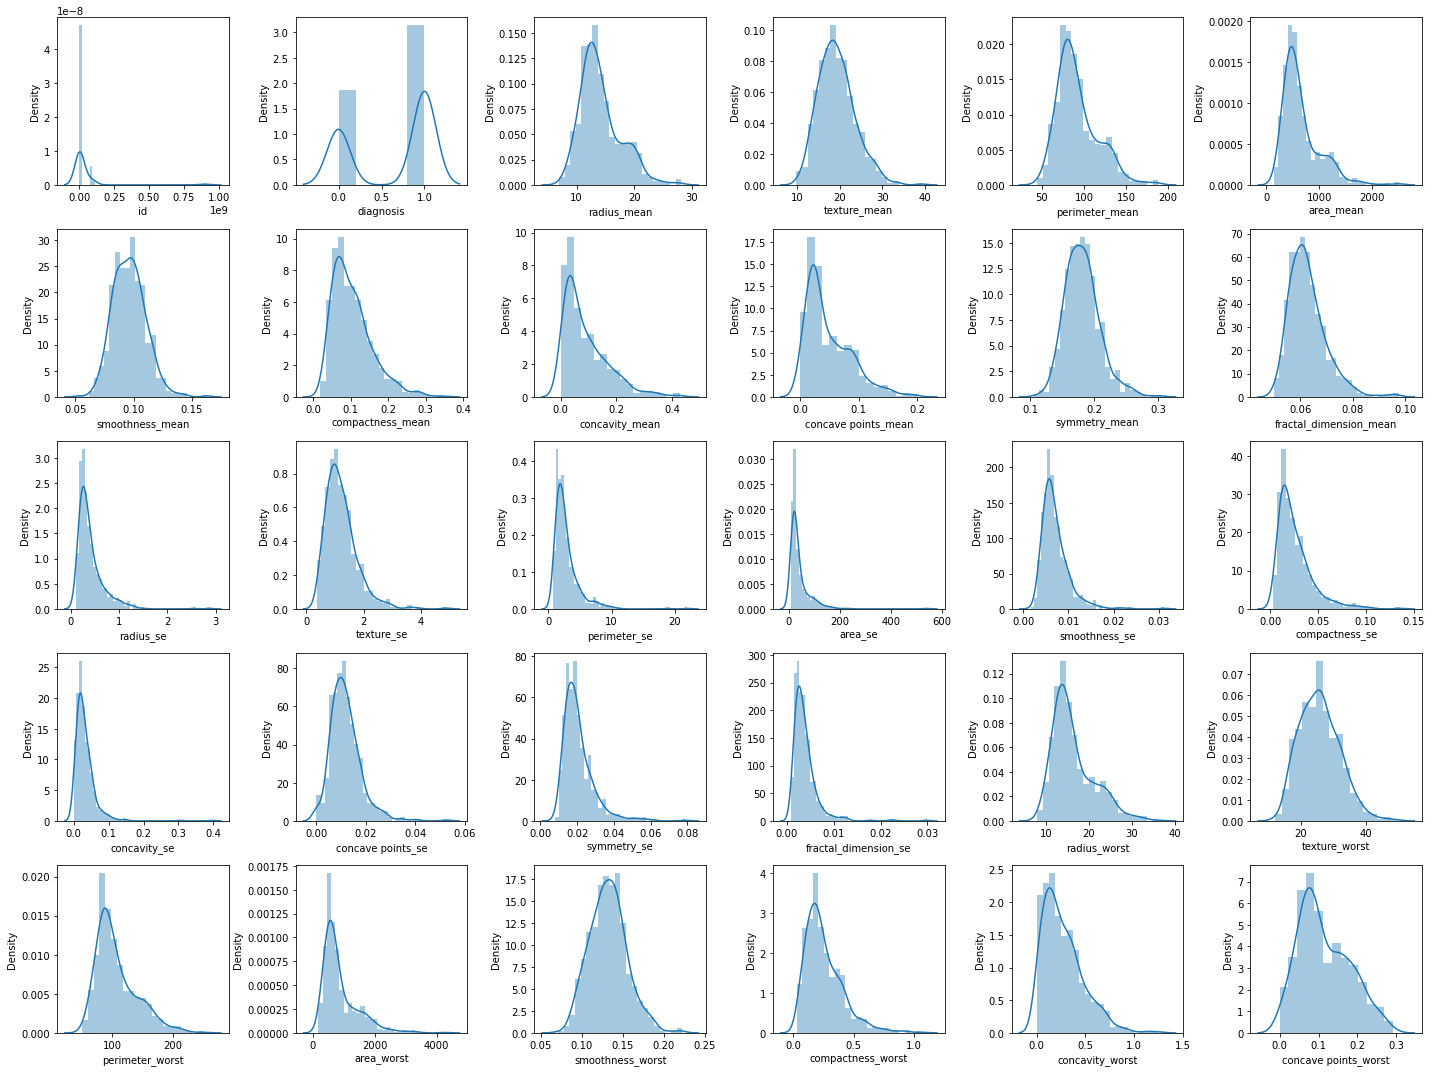

In [211]:
#EDA
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax = plt.subplot(5,6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()
plt.show()

In [212]:
df.drop('id', axis=1, inplace=True)

In [213]:
#calculating correlation matrix
corr_matrix = df.corr().abs()
#creating mask to hide upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#applying the mask to correlation matrix
tri_df = corr_matrix.mask(mask)
#identifying highly correlated features
to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]
df = df.drop(to_drop, axis=1)
print(df.shape[1])

24


In [214]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,0,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,0,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,0,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,0,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,0,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [216]:
#Handle NaN values by replacing them with the mean of the column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [217]:
#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [218]:
X_train.shape

(455, 31)

In [219]:
#creates an instance of the Gaussian Naive Bayes classifier and fitting its value to training data. 
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
pred = nb.predict(X_test_scaled)

In [220]:
#Model Evaluation
accuracy = (pred == y_test).mean()
print(f"Accuracy: {accuracy}")

Accuracy: 0.9473684210526315


In [221]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
pred = log_reg.predict(X_test_scaled)

In [222]:
#Prediction on test set
y_pred = log_reg.predict(X_test_scaled)

In [223]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1], dtype=int64)

In [224]:
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy}")

Accuracy: 0.9912280701754386


In [225]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

In [226]:
X_train.shape, X_test.shape

((455, 31), (114, 31))

In [227]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=6)

In [228]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

In [229]:
y_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9649122807017544

In [230]:
scores = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
#The KNN classifier is trained on the training set    
    knn.fit(X_train_scaled, y_train)
# Predictions are made on the scaled test set (X_test), using the trained classifier.
    y_pred = knn.predict(X_test_scaled)   
    scores.append(accuracy_score(y_test, y_pred))

In [231]:
scores

[0.9385964912280702,
 0.9649122807017544,
 0.9649122807017544,
 0.9736842105263158,
 0.956140350877193,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544]

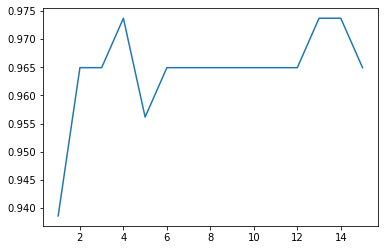

In [232]:
plt.plot(range(1,16), scores)

In [256]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [257]:
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.9298245614035088

In [258]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
print(cm)

[[40  7]
 [ 1 66]]


Text(69.0, 0.5, 'Actual')

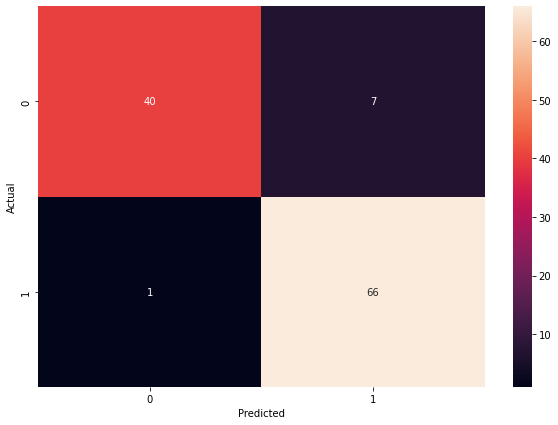

In [261]:
#visualizing confusion matrix as heat map
%matplotlib inline 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [263]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [265]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 22,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'random'}

In [266]:
grid_search_dt.best_score_

0.9604395604395604

In [267]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=5, splitter = 'random')

In [268]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [269]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.9210526315789473


In [271]:
input_data = np.array([[14.54, 27.54, 96.73, 658.8, 0.1139, 0.1595, 0.1639, 0.07364, 0.2303, 0.07077,
                         0.6965, 1.475, 4.782, 77.91, 0.005221, 0.03452, 0.04587, 0.01342, 0.01789,
                         0.003317, 15.11, 29.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977,
                         0.07259]])
# Scale the input data
input_data_scaled = scaler.transform(input_data)
# Make prediction
prediction = svm.predict(input_data_scaled)
# Display the prediction (0 for malignant, 1 for benign)
if prediction[0] == 0:
    print("The model predicts that the person has malignant breast cancer.")
else:
    print("The model predicts that the person has benign breast cancer.")

The model predicts that the person has malignant breast cancer.
